<a href="https://colab.research.google.com/github/MMoronto/pytorch_exercises/blob/master/custom_data_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision

# Note: Required to have PyTorch > 1.11.0 & torchvision > 0.12.0 for Food101 dataset
assert int(torch.__version__.split(".")[1]) >= 11
assert int(torchvision.__version__.split(".")[1]) >= 11

import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Setup data directory
import pathlib
data_dir = pathlib.Path("../data")

In [2]:
# Get training data
train_data = datasets.Food101(root=data_dir,
                              split="train",
                              # transform=transforms.ToTensor(),
                              download=True)
# Get testing data
test_data = datasets.Food101(root=data_dir,
                              split="test",
                              # transform=transforms.ToTensor(),
                              download=True)

  0%|          | 0/4996278331 [00:00<?, ?it/s]

Extracting ../data/food-101.tar.gz to ../data


In [3]:
train_data

Dataset Food101
    Number of datapoints: 75750
    Root location: ../data
    split=train

In [4]:
class_names = train_data.classes
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

churros


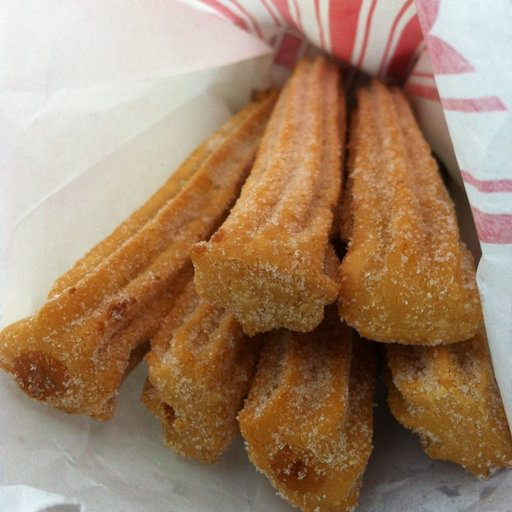

In [5]:
# View first sample (PIL image format)
print(class_names[train_data[0][1]])
train_data[1][0]

In [6]:
# Get random 10% of training images
import random 

# Setup data paths 
data_path = data_dir / "food-101" / "images" 
target_classes = ["churros", "baklava", "beignets"]

# Change amount of data to get (e.g. 0.1 = random 10%, 0.2 = random 20%)
amount_to_get = 0.2

# Create function to separate a random amount of data
def get_subset(image_path=data_path,
               data_splits=["train", "test"],
               target_classes=["churros", "baklava", "beignets"],
               amount=0.1,
               seed=42):
    random.seed(42)
    label_splits = {}

    # Get labels
    for data_split in data_splits:
        print(f"[INFO] Creating image split for: {data_split}...")
        label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"
        with open(label_path, "r") as f:
          labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes]

        # Get random subset of target classes image ID's
        number_to_sample = round(amount * len(labels))
        print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
        sampled_images = random.sample(labels, k=number_to_sample)

        # Apply full paths
        image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
        label_splits[data_split] = image_paths
    return label_splits

label_splits = get_subset(amount=amount_to_get)
label_splits["train"][:10]

[INFO] Creating image split for: train...
[INFO] Getting random subset of 450 images for train...
[INFO] Creating image split for: test...
[INFO] Getting random subset of 150 images for test...


[PosixPath('../data/food-101/images/baklava/3140803.jpg'),
 PosixPath('../data/food-101/images/baklava/1451812.jpg'),
 PosixPath('../data/food-101/images/beignets/2835963.jpg'),
 PosixPath('../data/food-101/images/beignets/2148269.jpg'),
 PosixPath('../data/food-101/images/beignets/1631091.jpg'),
 PosixPath('../data/food-101/images/baklava/3678786.jpg'),
 PosixPath('../data/food-101/images/baklava/2929554.jpg'),
 PosixPath('../data/food-101/images/churros/944058.jpg'),
 PosixPath('../data/food-101/images/baklava/2581678.jpg'),
 PosixPath('../data/food-101/images/churros/1977745.jpg')]

##**Move training and testing images to dedicated folders**

In [7]:
# Create target directory path
# target_dir_name = f"../data/churros_baklava_beignets_{str(int(amount_to_get*100))}_percent"
target_dir_name = f"../churros_baklava_beignets_{str(int(amount_to_get*100))}_percent"
print(f"Creating_directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories 
target_dir.mkdir(parents=True, exist_ok=True) 

Creating_directory: '../churros_baklava_beignets_20_percent'


In [8]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

[INFO] Copying ../data/food-101/images/baklava/3140803.jpg to ../churros_baklava_beignets_20_percent/train/baklava/3140803.jpg...
[INFO] Copying ../data/food-101/images/baklava/1451812.jpg to ../churros_baklava_beignets_20_percent/train/baklava/1451812.jpg...
[INFO] Copying ../data/food-101/images/beignets/2835963.jpg to ../churros_baklava_beignets_20_percent/train/beignets/2835963.jpg...
[INFO] Copying ../data/food-101/images/beignets/2148269.jpg to ../churros_baklava_beignets_20_percent/train/beignets/2148269.jpg...
[INFO] Copying ../data/food-101/images/beignets/1631091.jpg to ../churros_baklava_beignets_20_percent/train/beignets/1631091.jpg...
[INFO] Copying ../data/food-101/images/baklava/3678786.jpg to ../churros_baklava_beignets_20_percent/train/baklava/3678786.jpg...
[INFO] Copying ../data/food-101/images/baklava/2929554.jpg to ../churros_baklava_beignets_20_percent/train/baklava/2929554.jpg...
[INFO] Copying ../data/food-101/images/churros/944058.jpg to ../churros_baklava_beig

In [9]:
# Check lengths of directories
def walk_through_dir(dir_path):

  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(target_dir)

There are 2 directories and 0 images in '../churros_baklava_beignets_20_percent'.
There are 3 directories and 0 images in '../churros_baklava_beignets_20_percent/test'.
There are 0 directories and 46 images in '../churros_baklava_beignets_20_percent/test/baklava'.
There are 0 directories and 46 images in '../churros_baklava_beignets_20_percent/test/churros'.
There are 0 directories and 58 images in '../churros_baklava_beignets_20_percent/test/beignets'.
There are 3 directories and 0 images in '../churros_baklava_beignets_20_percent/train'.
There are 0 directories and 154 images in '../churros_baklava_beignets_20_percent/train/baklava'.
There are 0 directories and 150 images in '../churros_baklava_beignets_20_percent/train/churros'.
There are 0 directories and 146 images in '../churros_baklava_beignets_20_percent/train/beignets'.


In [10]:
# Zip churros_baklava_beignets images
zip_file_name = data_dir / f"churros_baklava_beignets_{str(int(amount_to_get*100))}_percent"
shutil.make_archive(zip_file_name,
                    format="zip",
                    root_dir=target_dir)

'/data/churros_baklava_beignets_20_percent.zip'

In [11]:
!ls -la ../data/

total 4907392
drwxr-xr-x 3 root root       4096 Mar  1 20:50 .
drwxr-xr-x 1 root root       4096 Mar  1 20:50 ..
-rw-r--r-- 1 root root   28869356 Mar  1 20:51 churros_baklava_beignets_20_percent.zip
drwxr-xr-x 4 3156  320       4096 Jul  9  2014 food-101
-rw-r--r-- 1 root root 4996278331 Mar  1 20:49 food-101.tar.gz


In [12]:
!mkdir -p churros_baklava_beignets
!unzip ../data/churros_baklava_beignets_20_percent.zip -d churros_baklava_beignets

Archive:  ../data/churros_baklava_beignets_20_percent.zip
   creating: churros_baklava_beignets/test/
   creating: churros_baklava_beignets/train/
   creating: churros_baklava_beignets/test/baklava/
   creating: churros_baklava_beignets/test/beignets/
   creating: churros_baklava_beignets/test/churros/
  inflating: churros_baklava_beignets/test/baklava/3124550.jpg  
  inflating: churros_baklava_beignets/test/baklava/1351482.jpg  
  inflating: churros_baklava_beignets/test/baklava/558342.jpg  
  inflating: churros_baklava_beignets/test/baklava/2553456.jpg  
  inflating: churros_baklava_beignets/test/baklava/50627.jpg  
  inflating: churros_baklava_beignets/test/baklava/3680783.jpg  
  inflating: churros_baklava_beignets/test/baklava/3697640.jpg  
  inflating: churros_baklava_beignets/test/baklava/2593821.jpg  
  inflating: churros_baklava_beignets/test/baklava/158510.jpg  
  inflating: churros_baklava_beignets/test/baklava/3453153.jpg  
  inflating: churros_baklava_beignets/test/baklava

In [13]:
!ls ../data

churros_baklava_beignets_20_percent.zip  food-101  food-101.tar.gz


In [14]:
walk_through_dir("churros_baklava_beignets")

There are 2 directories and 0 images in 'churros_baklava_beignets'.
There are 3 directories and 0 images in 'churros_baklava_beignets/test'.
There are 0 directories and 46 images in 'churros_baklava_beignets/test/baklava'.
There are 0 directories and 46 images in 'churros_baklava_beignets/test/churros'.
There are 0 directories and 58 images in 'churros_baklava_beignets/test/beignets'.
There are 3 directories and 0 images in 'churros_baklava_beignets/train'.
There are 0 directories and 154 images in 'churros_baklava_beignets/train/baklava'.
There are 0 directories and 150 images in 'churros_baklava_beignets/train/churros'.
There are 0 directories and 146 images in 'churros_baklava_beignets/train/beignets'.


In [15]:
!ls

churros_baklava_beignets  sample_data


##0. Import PyTorch and set up device-agnostic code

In [16]:
import torch
from torch import nn

# Note: this notebook requires torch >= 1.10.0
torch.__version__

'1.13.1+cu116'

In [17]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

##1. Get data

In [20]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "churros_baklava_beignets"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download churros, baklava, beignets data
    with open(data_path / "churros_baklava_beignets.zip", "wb") as f:
        request = requests.get("https://github.com/MMoronto/pytorch_exercises/content/data/churros_baklava_beignets.zip")
        print("Downloading churros, baklava, beignets data...")
        f.write(request.content)

    # Unzip churros, baklava, beignets data
    with zipfile.ZipFile(data_path / "churros_baklava_beignets.zip", "r") as zip_ref:
        print("Unzipping churros, baklava, beignets data...") 
        zip_ref.extractall(image_path)

data/churros_baklava_beignets directory exists.


##2. Prepare data

In [21]:
import os
def walk_through_dir(dir_path):

  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [22]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/churros_baklava_beignets'.
There are 3 directories and 0 images in 'data/churros_baklava_beignets/test'.
There are 0 directories and 46 images in 'data/churros_baklava_beignets/test/baklava'.
There are 0 directories and 46 images in 'data/churros_baklava_beignets/test/churros'.
There are 0 directories and 58 images in 'data/churros_baklava_beignets/test/beignets'.
There are 3 directories and 0 images in 'data/churros_baklava_beignets/train'.
There are 0 directories and 154 images in 'data/churros_baklava_beignets/train/baklava'.
There are 0 directories and 150 images in 'data/churros_baklava_beignets/train/churros'.
There are 0 directories and 146 images in 'data/churros_baklava_beignets/train/beignets'.


In [23]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/churros_baklava_beignets/train'),
 PosixPath('data/churros_baklava_beignets/test'))

Random image path: data/churros_baklava_beignets/test/beignets/3750281.jpg
Image class: beignets
Image height: 512
Image width: 512


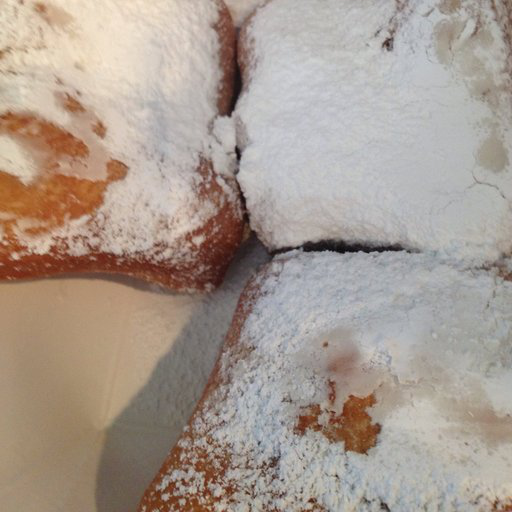

In [24]:
import random
from PIL import Image

# Set seed
random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the same name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4, Open Image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

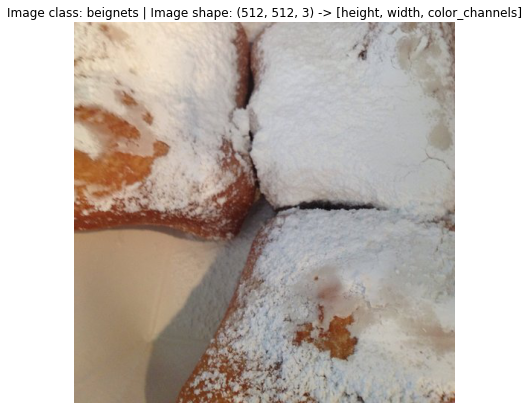

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

##3. Transform data

In [26]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [27]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the image to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel vals from 0 to 225 to be between 0.0 and 1.0
])

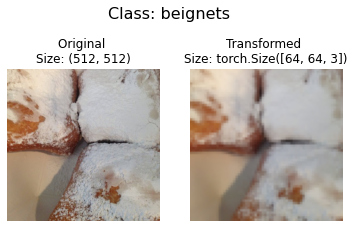

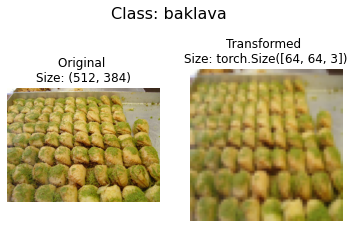

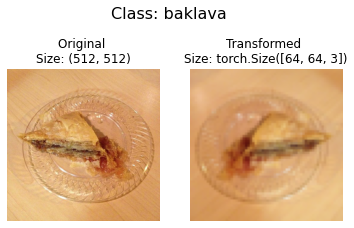

In [28]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):

    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

##4. Option 1: Load Image Data Using `ImageFolder`

In [29]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transform to perform on labels(if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 450
    Root location: data/churros_baklava_beignets/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 150
    Root location: data/churros_baklava_beignets/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


PyTorch has registered our `Datasets`. Let's inspect them by checking out the `classes` and `class_to_idx` attributes and the lengths of our training and teest sets.

In [30]:
# Get class names as a list
class_names = train_data.classes
class_names

['baklava', 'beignets', 'churros']

In [31]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'baklava': 0, 'beignets': 1, 'churros': 2}

In [32]:
# Check the lengths
len(train_data), len(test_data)

(450, 150)

We can index in on our `train_data` and `test_data` `Dataset`s to find samples and target labels.

In [33]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Image datatype: {type(label)}")

Image tensor:
tensor([[[0.8275, 0.7647, 0.6980,  ..., 0.2510, 0.2549, 0.2588],
         [0.8431, 0.7843, 0.7137,  ..., 0.2471, 0.2392, 0.2392],
         [0.8588, 0.8000, 0.7333,  ..., 0.3098, 0.3098, 0.3137],
         ...,
         [0.0549, 0.0549, 0.0784,  ..., 0.1333, 0.1333, 0.1294],
         [0.0549, 0.0549, 0.0549,  ..., 0.1255, 0.1216, 0.1216],
         [0.0549, 0.0549, 0.0549,  ..., 0.1059, 0.1059, 0.1098]],

        [[0.8784, 0.8275, 0.7529,  ..., 0.2314, 0.2353, 0.2392],
         [0.8902, 0.8392, 0.7725,  ..., 0.2196, 0.2196, 0.2235],
         [0.8980, 0.8510, 0.7922,  ..., 0.2863, 0.2902, 0.2941],
         ...,
         [0.0353, 0.0353, 0.0588,  ..., 0.0941, 0.0941, 0.0902],
         [0.0353, 0.0353, 0.0353,  ..., 0.0902, 0.0863, 0.0824],
         [0.0353, 0.0392, 0.0392,  ..., 0.0784, 0.0784, 0.0784]],

        [[0.9373, 0.9059, 0.8353,  ..., 0.2157, 0.2235, 0.2275],
         [0.9412, 0.9098, 0.8588,  ..., 0.2118, 0.2078, 0.2078],
         [0.9490, 0.9216, 0.8784,  ..., 0.26

Our images are now in tensor form(with shape `[3, 64, 64]` & the labels are in the form of an integer relating to a specific class(as referenced by the `class_to_idx` attribute). Right now our image dimensions are in the format CHW (color channels, height, width) but matplotlib prefers HWC (height, width, color channels).
We'll plot a single image tensor using `matplotlib`. First we have to do a permutation on the tensor to make its dimensions compatible.

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


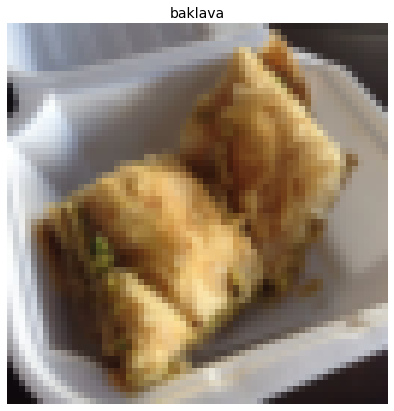

In [34]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out diff. shapes (b4 & after permutation)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

###4.1 Turn loaded images into `DataLoader`s

Turning our `Dataset`s into `DataLoader`s using `torch.utils.data.DataLoader` makes them iterable so a model can go through learn the relationships between samples and targets (features and labels).

To keep things simple, we'll use a `batch_size=1` and `num_workers=1`.

**Note:** the higher value num_workers is set to, the more compute power PyTorch will use to load your data.

Personally, I usually set it to the total number of CPUs on my machine via Python's `os.cpu_count()`.

This ensures the DataLoader recruits as many cores as possible to load data.

In [35]:
# Turn train & test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=1, 
                              num_workers=1, 
                              shuffle=True) # don't usu. need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fcc4080b730>,
 <torch.utils.data.dataloader.DataLoader at 0x7fcc4080b9a0>)

Now our data is iterable. Let's check the shapes.

In [36]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


We could now use these DataLoader's with a training and testing loop to train a model.

##5. Option 2: Load Image Data with a Custom `Dataset`

What if a pre-built `Dataset` creator like `torchvision.datasets.ImageFolder()` or one for our specific problem didn't exist? 
Well, we could build our own.

To see this in action, let's work towards replicating `torchvision.datasets.ImageFolder()` by subclassing `torch.utils.data.Dataset` (the base class for all Dataset's in PyTorch).

We'll start by importing the modules we need:

*Python's `os` for dealing with directories (our data is stored in directories).
*Python's `pathlib` for dealing with filepaths (each of our images has a unique filepath).
* `torch` for all things PyTorch.
*PIL's Image class for loading images.
*`torch.utils.data.Dataset` to subclass and create our own custom `Dataset`.
*`torchvision.transforms` to turn our images into tensors.
*Various types from Python's typing module to add type hints to our code.


In [37]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

Remember how our instances of `torchvision.datasets.ImageFolder()` allowed us to use the `classes` and `class_to_idx` attributes?

In [38]:
# Instace of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['baklava', 'beignets', 'churros'],
 {'baklava': 0, 'beignets': 1, 'churros': 2})

###5.1 Creating a helper function to get class names

We'll write a helper function capable of creating a list of class names and a dictionary of class names and their indexes given a directory path.

To do so, we'll:

1. Get the class names using `os.scandir()` to traverse a target directory (ideally the directory is in standard image classification format).
2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory structure).
3. Turn the class names into a dictionary of numerical labels, one for each class.
Let's see a small example of step 1 before we write the full function.

In [39]:
# Setup path target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Target directory: data/churros_baklava_beignets/train
Class names found: ['baklava', 'beignets', 'churros']


We'll turn it into a full function.

In [40]:
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:

  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names not found
  if not classes:
      raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

  # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
  class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
  return classes, class_to_idx

In [41]:
find_classes(train_dir)

(['baklava', 'beignets', 'churros'],
 {'baklava': 0, 'beignets': 1, 'churros': 2})


###5.2 Create a custom Dataset to replicate ImageFolder

Now we're ready to build our own custom Dataset.

We'll build one to replicate the functionality of torchvision.datasets.ImageFolder().


1. Subclass `torch.utils.data.Dataset`.
2. Initialize our subclass with a `targ_dir` parameter (the target data directory) and transform parameter (so we have the option to transform our data if needed).
3. Create several attributes for paths (the paths of our target images), transform (the transforms we might like to use, this can be None), `classes` and `class_to_idx` (from our `find_classes()` function).
4. Create a function to load images from file and return them, this could be using PIL or `torchvision.io` (for input/output of vision data).
5. Overwrite the `__len__` method of `torch.utils.data.Dataset` to return the number of samples in the `Dataset`, this is recommended but not required. This is so you can call `len(Dataset)`.
6. Overwrite the `__getitem__` method of `torch.utils.data.Dataset` to return a single sample from the `Dataset`, this is required.

In [42]:
# Write a custom dataset class (inherits from torch.utils.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

    # 2. Initialize with a targ_dir & transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:

        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have 
        # Setup transforms
        self.transform = transform
        # Create classes, self.class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)

    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (x, y)
        else:
            return img, class_idx # return data, label (X, y)

We've written some code to load in our images. Fortunately, we could move it into a `.py` file such as `data_loader.py` along with some other helpful data functions and reuse it later on.

Before we test out our new ImageFolderCustom class, let's create some transforms to prepare our images.

In [43]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

Let's turn our training images (contained in `train_dir`) and our testing images (contained in test_dir) into Dataset's using our own `ImageFolderCustom` class.

In [44]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                      transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7fcc409e6820>,
 <__main__.ImageFolderCustom at 0x7fcc409e67c0>)

Let's try calling len() on our new Dataset's and find the classes and class_to_idx attributes to verify if this works.

In [45]:
len(train_data_custom), len(test_data_custom)

(450, 150)

In [46]:
train_data_custom.classes

['baklava', 'beignets', 'churros']

In [47]:
train_data_custom.class_to_idx

{'baklava': 0, 'beignets': 1, 'churros': 2}


`len(test_data_custom) == len(test_data)` and `len(test_data_custom) == len(test_data)`

It appears it worked.

In [48]:
# Check for equality amongst our custom Dataset & ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


###5.3 Create a function to display random images

Let's create a helper function called `display_random_images()` that helps us visualize images in our Dataset's.

Specifically, it'll:

1. Take in a `Dataset` and a number of other parameters such as `classes` (the names of our target classes), the number of images to display (`n`) and a random seed.
2. To prevent the display getting out of hand, we'll cap `n` at 10 images.
3. Set the random seed for reproducible plots (if `seed` is set).
4. Get a list of random sample indexes (we can use Python's `random.sample()` for this) to plot.
5. Setup a `matplotlib` plot.
6. Loop through the random sample indexes found in step 4 and plot them with `matplotlib`.
7. Make sure the sample images are of shape `HWC` (height, width, color channels) so we can plot them.


In [49]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

Let's test out the function first with the Dataset we created with `torchvision.datasets.ImageFolder()`.

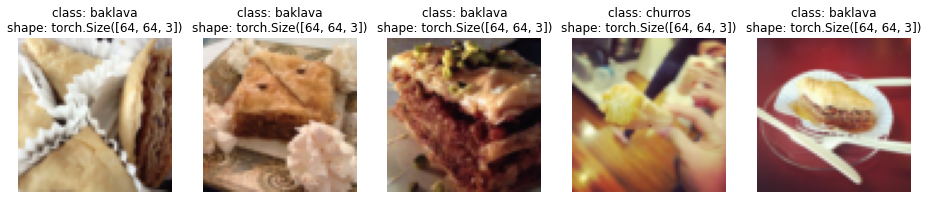

In [50]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data, 
                      n=5, 
                      classes=class_names,
                      seed=None)

And then test it out with the `Dataset` created with our own `ImageFolderCustom`.

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


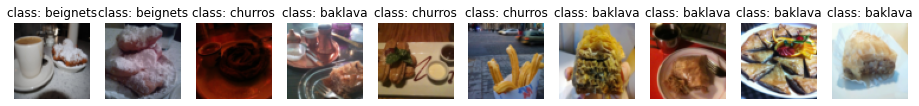

In [51]:
# Display random images from ImageFolderCustom Dataset
display_random_images(train_data_custom, 
                      n=12, 
                      classes=class_names,
                      seed=None)

In [52]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1, 
                                    num_workers=0, 
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7fcc3ffb46a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fcce5a4e1c0>)

In [53]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


#6. Other forms of transforms (data augmentation)

The purpose of tranforms is to alter your images in some way.
Doing this kinds of transforms is often referred to as data augmentation.

Data augmentation is the process of altering your data in such a way that you artificially increase the diversity of your training set.

Training a model on this artificially altered dataset hopefully results in a model that is capable of better generalization (the patterns it learns are more robust to future unseen examples).

Machine learning is all about harnessing the power of randomness and research shows that random transforms (like `transforms.RandAugment()` and `transforms.TrivialAugmentWide()`) generally perform better than hand-picked transforms.

We can test `transforms.TrivialAugmentWide()` out on some of our own images.

The main parameter to pay attention to in `transforms.TrivialAugmentWide()` is `num_magnitude_bins=31`.

It defines how much of a range an intensity value will be picked to apply a certain transform, 0 being no range and `31` being maximum range (highest chance for highest intensity).

We can incorporate transforms.TrivialAugmentWide() into transforms.Compose().

In [54]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense 
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor()
])

Now we've got a training transform (with data augmentation) and test transform (without data augmentation).

Let's test our data augmentation out!

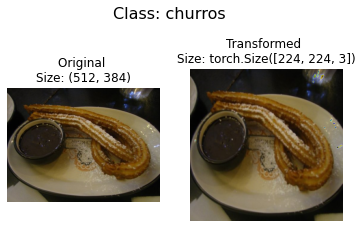

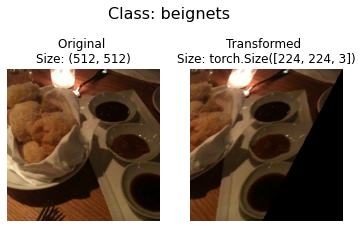

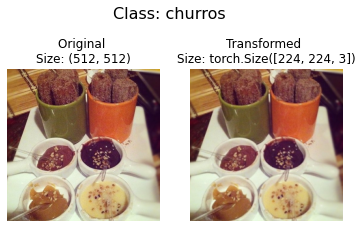

In [55]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None 
)

#7. Model 0: TinyVGG without data augmentation

Let's construct a computer vision model to see if we can classify if an image is of churros, baklava or beignets.

To begin, we'll start with a simple transform, only resizing the images to (64, 64) and turning them into tensors.

##7.1 Creating transforms and loading data for Model 0

In [56]:
# Create simple transforms
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

Now we've got a simple transform, let's:

1. Load the data, turning each of our training and test folders first into a `Dataset` with `torchvision.datasets.ImageFolder()`
2. Then into a `DataLoader` using `torch.utils.data.DataLoader()`.
* We'll set the `batch_size=32` and `num_workers` to as many CPUs on our machine (this will depend on what machine you're using).

In [57]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoaders with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoaders
train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                batch_size=BATCH_SIZE,
                                shuffle=False,
                                num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoaders with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7fcce5acba60>,
 <torch.utils.data.dataloader.DataLoader at 0x7fcce5acbdc0>)

We've created a `DataLoader`. We'll build a model in the next step.

###7.2 Create TinyVGG model class

In [58]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from: 
  https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,
                       stride=2) # default stride val is same as kernel size
      )
      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
          nn.ReLU(),
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2)
      )
      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=hidden_units*16*16,
                    out_features=output_shape)
      )

  def forward(self, x: torch.Tensor):
      x = self.conv_block_1(x)
      # print(x.shape)
      x = self.conv_block_2(x)
      # print(x.shape)
      x = self.classifier(x)
      # print(x.shape)
      return x
      # Return self.classifierself.conv_block_2(self.conv_block_2(self.conv_block_1(x)))

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0
    


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

We can test our model with a forward pass on a single image

###7.3 Try a forward pass on a single image (to test the model)

A good way to test a model is to do a forward pass on a single piece of data.

To do a forward pass on a single image, let's:

1. Get a batch of images and labels from the `DataLoader`.
2. Get a single image from the batch and `unsqueeze()` the image so it has a batch size of 1 (so its shape fits the model).
3. Perform inference on a single image (making sure to send the image to the target `device`).
4. Print out what's happening and convert the model's raw output logits to prediction probabilities with `torch.softmax()` (since we're working with multi-class data) and convert the prediction probabilities to prediction labels with `torch.argmax()`.

In [59]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0705, 0.0659, 0.0388]])

Output prediction probabilities:
tensor([[0.3373, 0.3358, 0.3268]])

Output prediction label:
tensor([0])

Actual label:
2


Right now our model is outputting what we'd expect it to output. You'll probably notice its predictions are often wrong.
The model is essentially guessing using random weights because it hasn't been trained yet.

###7.4 Use `torchinfo` to get an idea of the shapes going through our model

A helpful way to get information from our model is to use torchinfo.

torchinfo comes with a summary() method that takes a PyTorch model as well as an input_shape and returns what happens as a tensor moves through your model.

In [60]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

The output of `torchinfo.summary()` gives us a whole bunch of information about our model.

Such as `Total params`, the total number of parameters in our model, the `Estimated Total Size (MB)` which is the size of our model.

You can also see the change in input and output shapes as data of a certain `input_size` moves through our model.

###7.5 Create train & test loop functions

We've got data and we've got a model.

Next we'll make some training and test loop functions to train our model on the training data and evaluate our model on the testing data.

And to make sure we can use these the training and testing loops again, we'll functionize them.

Specifically, we're going to make three functions:

1. `train_step()` - takes in a model, a `DataLoader`, a loss function and an optimizer and trains the model on the DataLoader.
2. `test_step()` - takes in a model, a `DataLoader` and a loss function and evaluates the model on the `DataLoader`.
3. `train()` - performs 1. and 2. together for a given number of epochs and returns a results dictionary.

Let's start by building `train_step()`.

Because we're dealing with batches in the DataLoader's, we'll accumulate the model loss and accuracy values during training (by adding them up for each batch) and then adjust them at the end before we return them.

In [61]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through dataloader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calc and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calc and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
        return train_loss, train_acc

With the `train_step()` function complete, we'll do the same for the `test_step()` function.
The main difference here will be the `test_step()` won't take in an optimizer and therefore won't perform gradient descent.

But since we'll be doing inference, we'll make sure to turn on the `torch.inference_mode()` context manager for making predictions.

In [62]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches 
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device 
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

###7.6 Creating a `train()` function to combine `train_step()` and `test_step()`

A good way to put our `train_step()` and `test_step()` functions together is to package them up in a `train()` function.

This function will train the model as well as evaluate it.

Specificially, it'll:

1. Take in a model, a DataLoader for training and test sets, an optimizer, a loss function and how many epochs to perform each train and test step for.
2. Create an empty results dictionary for `train_loss`, `train_acc`, `test_loss` and `test_acc` values (we can fill this up as training goes on).
3. Loop through the training and test step functions for a number of epochs.
4. Print out what's happening at the end of each epoch.
5. Update the empty results dictionary with the updated metrics each epoch.
6. Return the filled

To keep track of the number of epochs we've been through, let's import `tqdm` from `tqdm.auto` (`tqdm` is one of the most popular progress bar libraries for Python and `tqdm.auto` automatically decides what kind of progress bar is best for your computing environment, e.g. Jupyter Notebook vs. Python script).


In [63]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

###7.7 Train and Evaluate Model 0
At this point, we've got all of the ingredients we need to train and evaluate the model.

We'll put our `TinyVGG` model, `DataLoader`'s and `train()` function together to see if we can build a model capable of discerning between churros, baklava and beignets!

We'll train our model for 5 epochs to conserve time and we'll use `torch.nn.CrossEntropyLoss()` for an optimizer and loss function & `torch.optim.Adam()` with a learning rate of `1e-3`.

We'll import Python's `timeit.default_timer()` method to calculate the training time.

In [64]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out the duration
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1013 | train_acc: 0.4688 | test_loss: 1.1078 | test_acc: 0.2875
Epoch: 2 | train_loss: 1.0911 | train_acc: 0.3750 | test_loss: 1.1213 | test_acc: 0.2875
Epoch: 3 | train_loss: 1.1144 | train_acc: 0.3125 | test_loss: 1.1252 | test_acc: 0.2938
Epoch: 4 | train_loss: 1.0924 | train_acc: 0.3750 | test_loss: 1.1271 | test_acc: 0.3795
Epoch: 5 | train_loss: 1.0926 | train_acc: 0.4062 | test_loss: 1.1271 | test_acc: 0.3642


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1013 | train_acc: 0.4688 | test_loss: 1.1078 | test_acc: 0.2875
Epoch: 2 | train_loss: 1.0911 | train_acc: 0.3750 | test_loss: 1.1213 | test_acc: 0.2875
Epoch: 3 | train_loss: 1.1144 | train_acc: 0.3125 | test_loss: 1.1252 | test_acc: 0.2938
Epoch: 4 | train_loss: 1.0924 | train_acc: 0.3750 | test_loss: 1.1271 | test_acc: 0.3795
Epoch: 5 | train_loss: 1.0926 | train_acc: 0.4062 | test_loss: 1.1271 | test_acc: 0.3642
Total training time: 17.359 seconds


Observe how our model has performed pretty poorly.

###7.8 Plot the loss curves of Model 0

We trained our `model_0` & observed it's performed poorly. We can further evaluate it by plotting the model's loss curves.

Loss curves show the model's results over time.

And they're a great way to see how your model performs on different datasets (e.g. training and test).

Let's create a function to plot the values in our `model_0_results` dictionary.

In [65]:
# Check the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

We'll need to extract each of these keys and turn them into a plot.

In [66]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

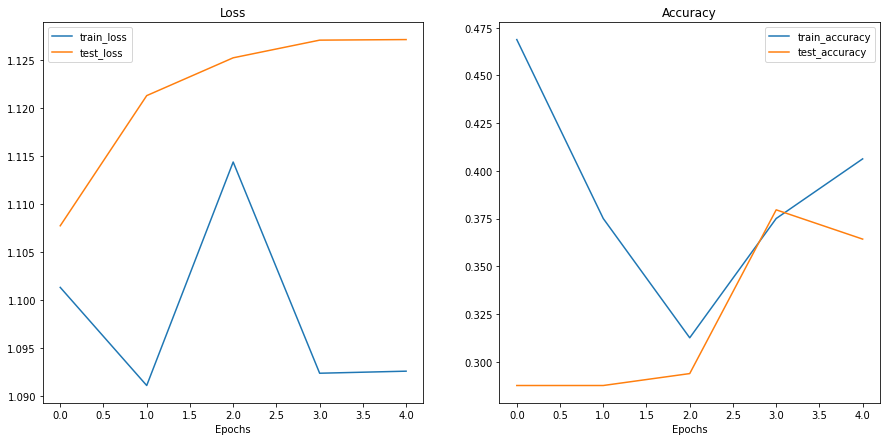

In [67]:
plot_loss_curves(model_0_results)

The curves verify what we already knew. Our model is suboptimal. We can use several methods to fix this situation. 

#8. Ideal loss curves

 Our training and test loss curves show us if our model is overfitting or underfitting.
 

 **ideal**
 The ideal position for a training and loss curve is for them to line up closely with each other.

**overfitting**
 An overfitting model is one that performs better (often by a considerable margin) on the training set than the validation/test set.

 i.e. When the training loss is far lower than test loss, the model is **overfitting**. It is learning the patterns in the training too well and those patterns aren't generalizing to the test data.

**Underfitting**
Happens when the training and test loss are not as low as we'd like.


###8.1 How to deal with overfitting

Since the main problem with overfitting is that the model is fitting the training data too well, we'll want to use techniques to "reign it in".

A common technique of preventing overfitting is known as regularization.

Think of this as "making our models more regular", as in, capable of fitting more kinds of data.

Let's discuss a few methods to prevent overfitting.

* Get more data
* Simplify your model
* Use data augmentation
* Use transfer learning
* Use dropout layers
* Use learning rate decay
* Use early stopping

###8.2 How to deal with underfitting

When a model is underfitting it is considered to have poor predictive power on the training and test sets.

An underfitting model will fail to reduce the loss values to a desired level.
The main idea behind dealing with underfitting is to increase your model's predictive power.

There are several ways to do this:

* Add more layers/units to your model
* Tweak the learning rate
* Use transfer learning
* Train for longer
* Use less regularization

There's a fine line between overfitting and underfitting as too much of either one can cause the other.

Transfer learning is perhaps one of the most powerful techniques when it comes to dealing with both overfitting and underfitting on our own problems.

Rather than handcraft different overfitting and underfitting techniques, transfer learning enables us to take an already working model in a similar problem space to ours and apply it to our own dataset.



# Model 1: TinyVGG with Data Augmentation

let's load in the data and use data augmentation to see if it improves our results in anyway.

First, we'll compose a training transform to include transforms.TrivialAugmentWide() as well as resize and turn our images into tensors.

We'll do the same for a testing transform except without the data augmentation.



###9.1 Create transform with data augmentation

In [68]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

We'll turn our images into `Dataset`s using `torchvision.datasets.ImageFolder()` and then into DataLoader's with `torch.utils.data.DataLoader()`.

In [69]:
# Turm image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 450
     Root location: data/churros_baklava_beignets/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 150
     Root location: data/churros_baklava_beignets/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                ToTensor()
            ))

#9.2 Create train and test `Dataset`s and `DataLoader`s
We'll make sure the train Dataset uses the `train_transform_trivial_augment` and the test `Dataset` uses the `test_transform`.

In [70]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 450
     Root location: data/churros_baklava_beignets/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 150
     Root location: data/churros_baklava_beignets/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                ToTensor()
            ))

In [71]:
# turn datasets into DataLoaders
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fcc3d16c0a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fcc4080b9a0>)

###9.3 Construct and train Model1

In [72]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

Our Model is set so it's time to train it.

Since we've already got functions for the training loop (`train_step()`) and testing loop (`test_step()`) and a function to put them together in `train()`, we'll reuse them.
We'll use the same setup as `model_0` with only the `train_dataloader` parameter varying:

Train for 5 epochs.
* Use `train_dataloader=train_dataloader_augmented` as the training data in `train()`.
* Use `torch.nn.CrossEntropyLoss()` as the loss function (since we're working with multi-class classification).
* Use `torch.optim.Adam()` with `lr=0.001` as the learning rate as the optimizer.

In [73]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_1
model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0998 | train_acc: 0.3125 | test_loss: 1.0946 | test_acc: 0.3500
Epoch: 2 | train_loss: 1.1066 | train_acc: 0.4062 | test_loss: 1.0995 | test_acc: 0.3500
Epoch: 3 | train_loss: 1.0940 | train_acc: 0.3750 | test_loss: 1.1030 | test_acc: 0.3500
Epoch: 4 | train_loss: 1.1050 | train_acc: 0.3438 | test_loss: 1.1025 | test_acc: 0.3500
Epoch: 5 | train_loss: 1.1297 | train_acc: 0.2500 | test_loss: 1.0986 | test_acc: 0.3500
Total training time: 19.137 seconds


Our model still underperforms. Let's inspect the loss curves to figure out why.

###9.4 Plot the loss curves of Model1

Since we've got the results of model_1 saved in a results dictionary, model_1_results, we can plot them using plot_loss_curves().

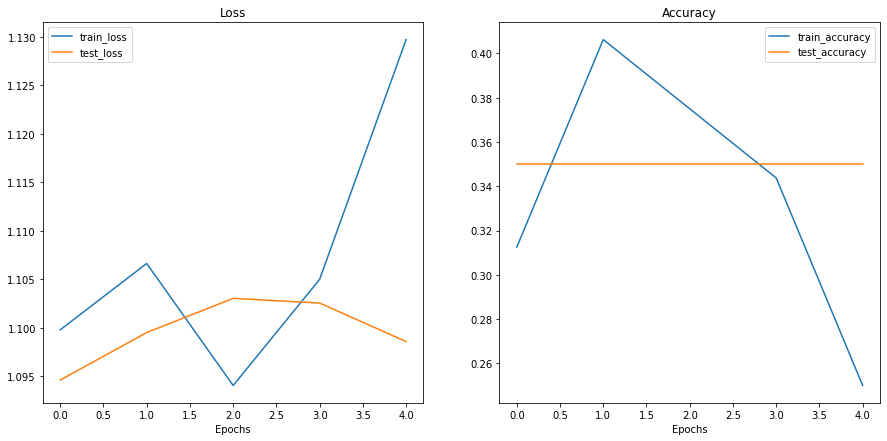

In [74]:
plot_loss_curves(model_1_results)

Is our model **overfitting** or **underfitting**?

#10. Compare model results

Our models underperforming, we'll write some code to compare them.

First we'll turn our model results in pandas DataFrames.

In [75]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.101343,0.46875,1.107753,0.287500
1,1.091133,0.37500,1.121297,0.287500
2,1.114388,0.31250,1.125231,0.293750
3,1.092409,0.37500,1.127070,0.379545
4,1.092623,0.40625,1.127128,0.364205


We can now write some plotting code using matplotlib to visualize the results of model_0 and model_1 together.

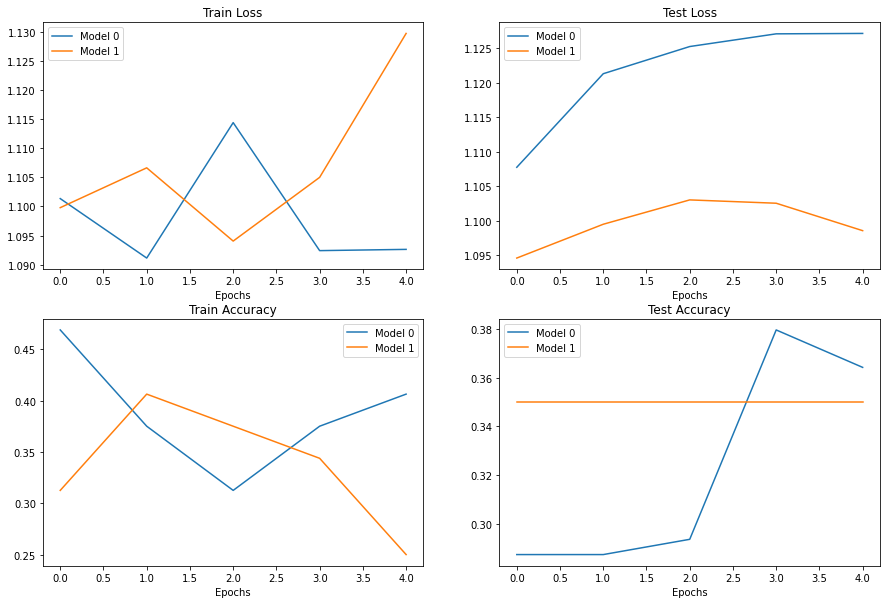

In [76]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

All four models don't look very good

Ideally we want higher accuracy and lower loss. 



#11. Make a prediction on a custom image

To use our model to make a prediction on one of our own custom images, we can load an image from our source of choice and then preprocess it in a way that matches the type of data our model was trained on.

In other words, we'll have to convert our own custom image to a tensor and make sure it's in the right datatype before passing it to our model.

Let's start by downloading a custom image using Python's `requests` module.

In [79]:
# Download custom image 
import requests

# Setup custom image path
custom_image_path = data_path / "churros-among-us.jpeg"

# Download the image if it doesn't exist already
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GItHub, need to use the 'raw' file link
        request = requests.get("")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

MissingSchema: ignored